In [155]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 
from sklearn.metrics import confusion_matrix
import datetime
import warnings
warnings.filterwarnings('ignore')

In [137]:
#load features
features = pd.read_csv("features_hourly.csv")
del features["Tomorrow0"]
del features["Tomorrow1"]
del features["Tomorrow2"]
del features["Yesterday0"]
del features["Yesterday1"]
del features["Yesterday2"]
for i in range(48,58):
   del features["usage_" + str(i)]
   del features["hum" + str(i)]
   del features["sum" + str(i)]
   del features["temp" + str(i)]
   del features["wind" + str(i)]
for i in range(24,58):
   del features["future_" + str(i)]

features["Date"] = features["Datum"]
del features["Datum"]
del features["Start Date"]

for i in features.columns:
    #print(i)
    pass
#del features["StartDate"]
features.head()

,usage_0,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,...,wind39,wind40,wind41,wind42,wind43,wind44,wind45,wind46,wind47,Date
0,3,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04
1,0,0,0,0,0,1,1,36,136,65,...,0.80,1.60,0.84,0.94,1.04,0.80,0.41,0.19,0.33,2015-01-05
2,0,1,0,0,0,1,6,32,118,88,...,3.17,2.94,2.11,2.72,3.02,3.08,2.50,1.44,0.94,2015-01-06
3,1,0,0,0,0,0,4,39,128,65,...,5.92,4.48,2.96,1.20,2.10,1.44,1.07,0.78,0.82,2015-01-07
4,1,0,0,0,0,0,4,17,57,36,...,7.11,6.14,6.69,6.93,7.37,6.65,6.57,6.40,6.38,2015-01-08


In [138]:
holidays = pd.read_csv("../raw/UK Bank Holidays.csv")
holidays["Holiday"] = holidays["Bank Holiday"]
del holidays["Name"]
del holidays["Bank Holiday"]
features = pd.merge(left=features,right=holidays, how="left")
features["Holiday"] = features["Holiday"].fillna(0)
features.head()

,usage_0,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,...,wind40,wind41,wind42,wind43,wind44,wind45,wind46,wind47,Date,Holiday
0,3,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04,0.0
1,0,0,0,0,0,1,1,36,136,65,...,1.60,0.84,0.94,1.04,0.80,0.41,0.19,0.33,2015-01-05,0.0
2,0,1,0,0,0,1,6,32,118,88,...,2.94,2.11,2.72,3.02,3.08,2.50,1.44,0.94,2015-01-06,0.0
3,1,0,0,0,0,0,4,39,128,65,...,4.48,2.96,1.20,2.10,1.44,1.07,0.78,0.82,2015-01-07,0.0
4,1,0,0,0,0,0,4,17,57,36,...,6.14,6.69,6.93,7.37,6.65,6.57,6.40,6.38,2015-01-08,0.0


In [139]:
def parse_date(s):
    a = s.split("-")
    return datetime.date(int(a[0]),int(a[1]),int(a[2]))
features["Month"] = features["Date"].map(lambda x: parse_date(x).month)
features["Weekday"] = features["Date"].map(lambda x: parse_date(x).weekday())
del features["Date"]

In [140]:
from collections import defaultdict
cleanup_nums = {"clear-day": 1, "clear-night": 1, "partly-cloudy-day": 2, "partly-cloudy-night": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7, "sleet": 7, 'nan': 1}
cleanup_nums = defaultdict(lambda: 1, cleanup_nums)
for i in range(48):
    features["sum" + str(i).zfill(2)] = features["sum" + str(i).zfill(2)].map(lambda x: cleanup_nums[x])
features["sum00"].head()

0    2
1    2
2    3
3    1
4    2
Name: sum00, dtype: int64

In [147]:
features = features.fillna(0)

In [148]:
features.tail()

,usage_0,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,...,wind41,wind42,wind43,wind44,wind45,wind46,wind47,Holiday,Month,Weekday
1522,0,1,2,0,0,1,0,23,79,86,...,17.12,14.89,12.83,11.69,10.81,10.78,10.50,0.0,3,4
1523,0,1,1,0,3,0,0,1,0,5,...,19.23,17.81,14.81,14.95,13.27,9.43,0.00,0.0,3,5
1524,1,0,0,1,0,0,0,0,0,1,...,25.17,21.73,21.27,17.49,14.76,0.00,0.00,0.0,3,6
1525,1,0,0,0,0,1,1,23,112,106,...,9.50,11.24,14.00,12.93,10.76,11.79,10.80,0.0,3,0
1526,0,1,0,0,0,1,2,13,108,89,...,7.89,5.93,3.85,4.67,4.00,4.68,4.13,0.0,3,1


In [149]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 1526
Columns: 267 entries, usage_0 to Weekday
dtypes: float64(193), int64(74)
memory usage: 3.1 MB


In [150]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
usage_0,1527.0,1.250164,1.446385,0.0,0.000,1.00,2.000,12.00
usage_1,1527.0,1.043222,1.470360,0.0,0.000,1.00,2.000,13.00
usage_2,1527.0,0.543549,1.033785,0.0,0.000,0.00,1.000,9.00
usage_3,1527.0,0.390308,0.956243,0.0,0.000,0.00,0.000,10.00
usage_4,1527.0,0.312377,0.875619,0.0,0.000,0.00,0.000,14.00
usage_5,1527.0,0.330714,0.784846,0.0,0.000,0.00,0.000,10.00
usage_6,1527.0,2.818599,2.638155,0.0,0.000,2.00,5.000,16.00
usage_7,1527.0,21.056974,15.928618,0.0,2.000,25.00,34.000,88.00
usage_8,1527.0,87.332024,63.848119,0.0,3.000,111.00,138.000,292.00
usage_9,1527.0,62.182711,44.475802,0.0,5.000,77.00,97.000,192.00


In [151]:
#Feature Matrix with past and today data
cols = features.columns
cols = filter(lambda x: x[:7] != "future_", cols)
X=features.loc[:,cols]
X.head()

,usage_0,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,...,wind41,wind42,wind43,wind44,wind45,wind46,wind47,Holiday,Month,Weekday
0,3,0,0,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1,6
1,0,0,0,0,0,1,1,36,136,65,...,0.84,0.94,1.04,0.80,0.41,0.19,0.33,0.0,1,0
2,0,1,0,0,0,1,6,32,118,88,...,2.11,2.72,3.02,3.08,2.50,1.44,0.94,0.0,1,1
3,1,0,0,0,0,0,4,39,128,65,...,2.96,1.20,2.10,1.44,1.07,0.78,0.82,0.0,1,2
4,1,0,0,0,0,0,4,17,57,36,...,6.69,6.93,7.37,6.65,6.57,6.40,6.38,0.0,1,3


In [188]:
y_tests = []
preds = []

for i in range(24):
    print(i)
    #target variable
    y = features['future_' + str(i)].tolist()
    #Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp = MLPRegressor(
    hidden_layer_sizes=(10,5),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    m = mlp.fit(X_train_scaled,y_train)
    predictions = m.predict(X_test_scaled)
    
    y_tests.append(y_test)
    preds.append(predictions)
    
    #Print scores
    print("Training set score: %f" % m.score(X_train_scaled, y_train))
    print("Test set score: %f" % m.score(X_test_scaled, y_test))
    
    #Compare predicted and actual values
    #df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
    #print(df.head())


0
Training set score: 0.991905
Test set score: -2.547877
1
Training set score: 0.888860
Test set score: -1.566077
2
Training set score: 0.987906
Test set score: -1.952237
3
Training set score: 0.976707
Test set score: -1.612725
4
Training set score: 0.997624
Test set score: -3.545954
5
Training set score: 0.974053
Test set score: -2.857255
6
Training set score: 0.994573
Test set score: -0.507395
7
Training set score: 0.996533
Test set score: 0.002855
8
Training set score: 0.999759
Test set score: 0.003142
9
Training set score: 0.999083
Test set score: -0.055827
10
Training set score: 0.990459
Test set score: -1.614615
11
Training set score: 0.976131
Test set score: -2.732172
12
Training set score: 0.960295
Test set score: -2.274079
13
Training set score: 0.934771
Test set score: -1.499711
14
Training set score: 0.961980
Test set score: -1.920515
15
Training set score: 0.959874
Test set score: -1.391466
16
Training set score: 0.957362
Test set score: -0.974697
17
Training set score: 0.9

<BarContainer object of 24 artists>

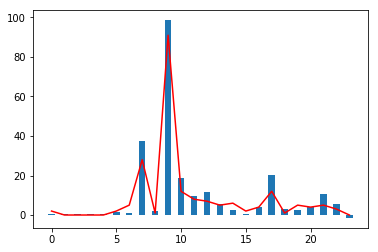

In [187]:
plt.plot(list(range(24)),list(map(lambda x:x[0],y_tests)), color="red")
plt.bar(list(range(24)),list(map(lambda x:x[0],preds)), 0.5)

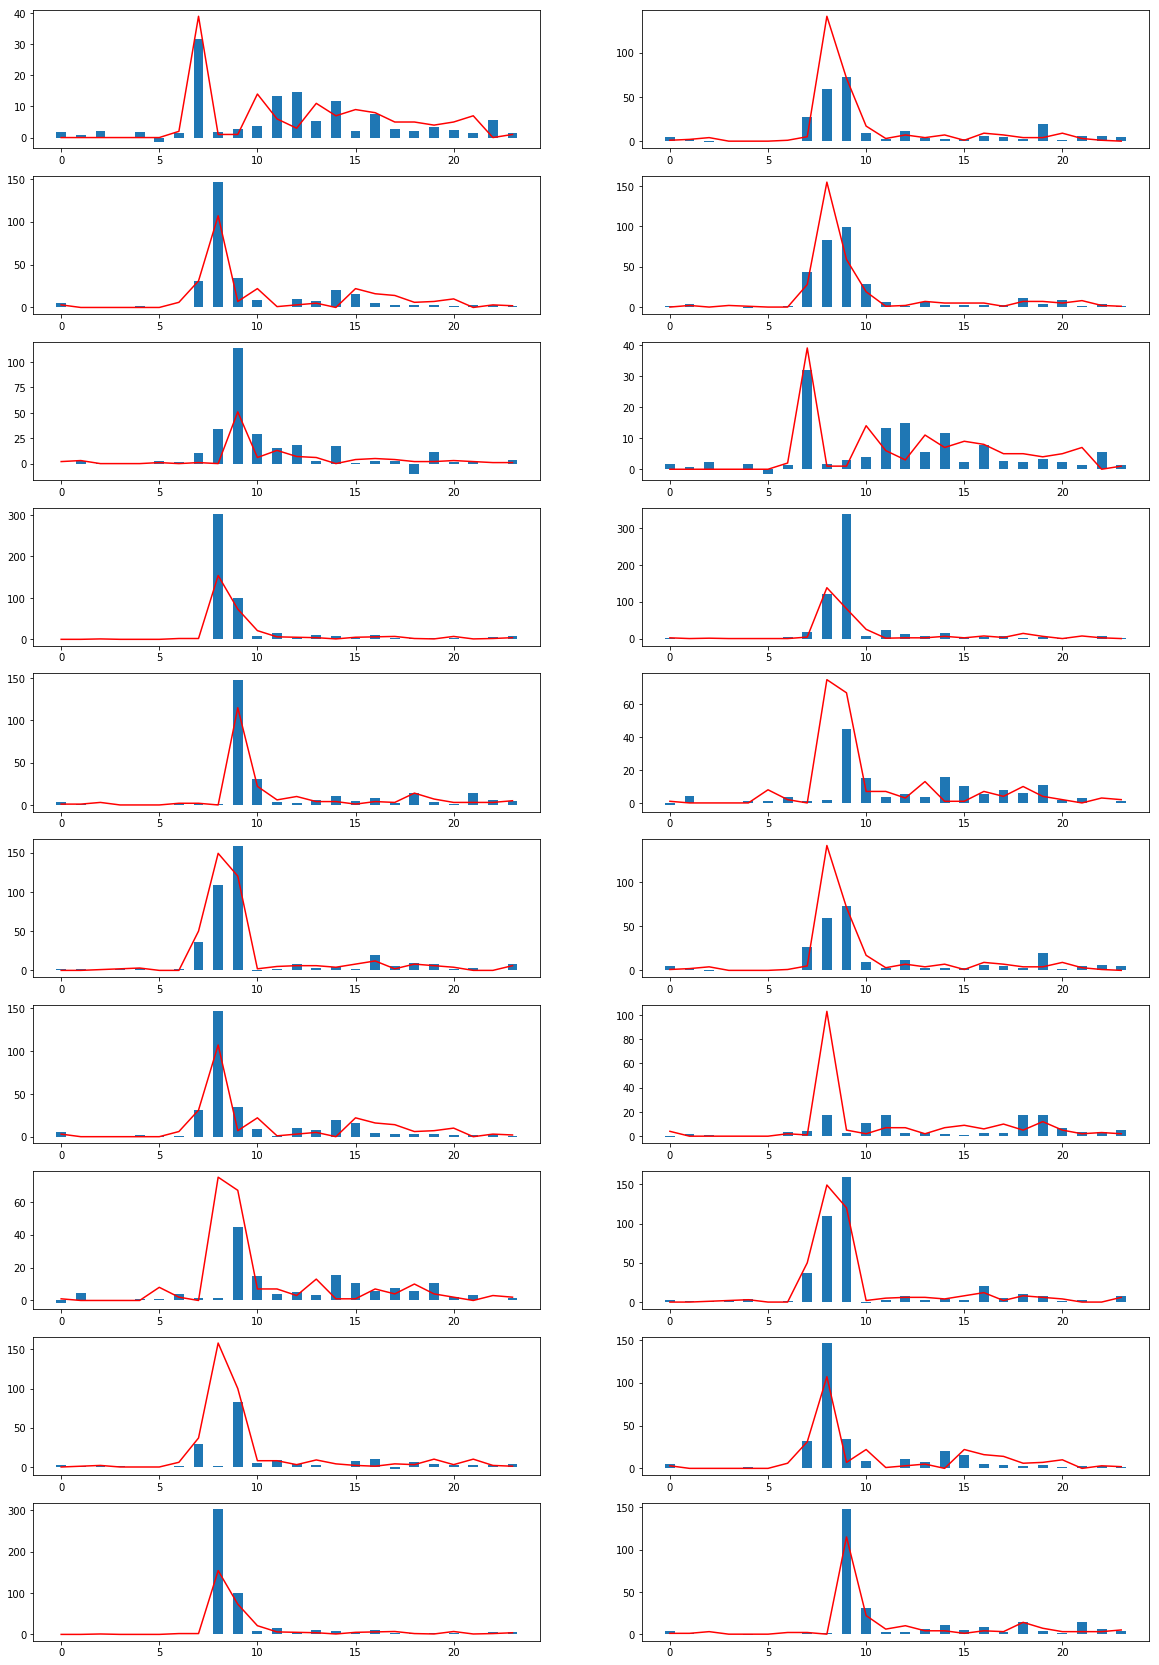

In [194]:
from random import randrange
length = 20
width = 2
height = length / width + length % width

plt.figure(figsize=(20,30))

for i in range(length):
    j = randrange(len(y_tests))
    plt.subplot(height, width, i + 1)
    plt.plot(list(range(24)),list(map(lambda x:x[j],y_tests)), color="red")
    plt.bar(list(range(24)),list(map(lambda x:x[j],preds)), 0.5)

plt.show() 

## Accuracy
Recommended from [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)<br>
```python
score(X, y, sample_weight=None)
```
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


In [17]:
#Returns the coefficient of determination R^2 of the prediction
"The accuracy of the model is {0:.7f}".format(mlp.score(X_train_scaled,y_train))

'The accuracy of the model is 0.8802106'

## RMSE = Root Mean Square Error 
is a frequently used measure of the differences between values predicted by a model. 

It is the standard deviation of prediction errors.<br>
[RMSE](https://www.statisticshowto.datasciencecentral.com/rmse/) answers the question of how concentrated the data is around the line of best fit.
![](img/rmse.png)
Where:<br>
f = forecasts (expected values or unknown results)<br>
o = observed values (known results)

In [18]:
#RMSE version 1
a=df.loc[:,'Actual']
b=df.loc[:,'Predicted']
rmse=sqrt(mean_squared_error(a, b))  
"The root mean square error of the model is {0:.3f}".format(rmse) 

'The root mean square error of the model is 60.184'

In [19]:
#RMSE version 2
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse = rmse(a,b)
"The root mean square error of the model is {0:.3f}".format(rmse)

'The root mean square error of the model is 60.184'

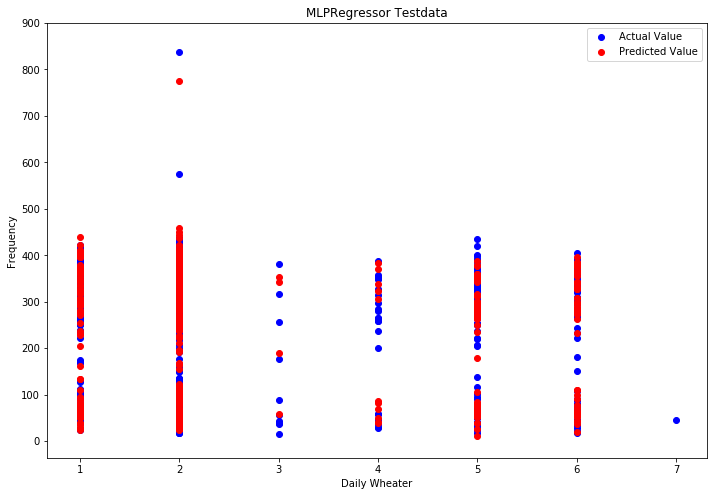

In [20]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,4], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,4], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Daily Wheater")
plt.show() 
fig.savefig('img/mlpDaily.png')

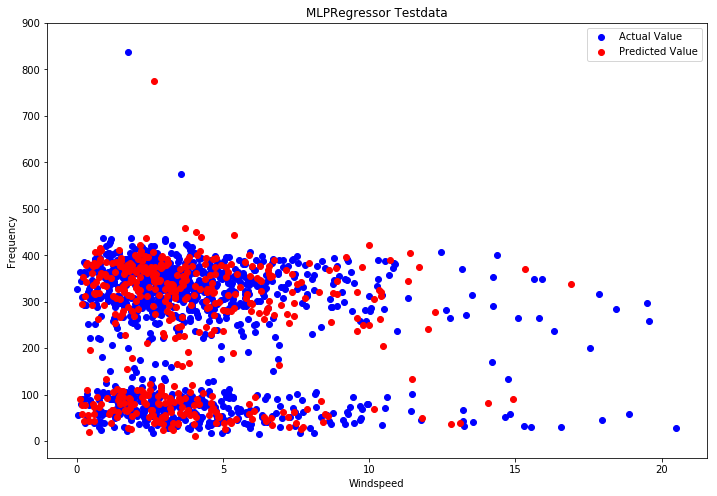

In [21]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,7], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,7], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Windspeed")
plt.show() 
fig.savefig('img/mlpWindspeed.png')

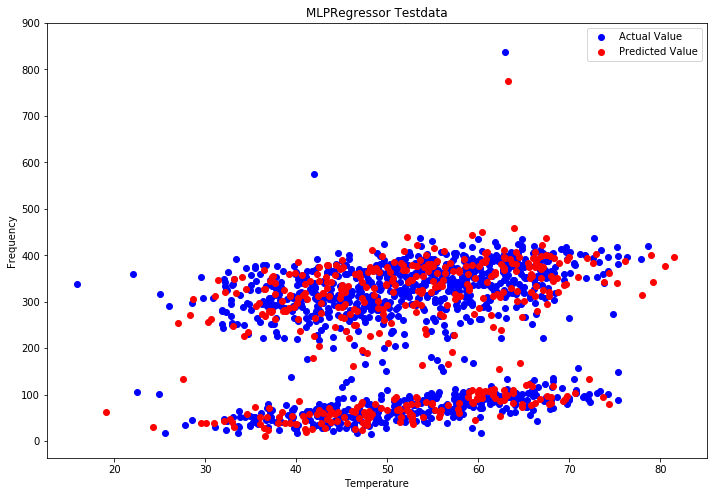

In [22]:
fig = plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,9], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,9], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show() 
fig.savefig('img/mlpTemp.png')